<a href="https://colab.research.google.com/github/athulrj02/TwiPipeline/blob/main/DA%7CCA_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Athul Raj

**20035410**

In [ ]:
# !pip install tweepy pandas

In [ ]:
import yaml
import requests
import pandas as pd
import json
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading configration file(process_yaml)

In [ ]:
def process_yaml(file_path):
  with open(file_path, 'r') as file:
    return yaml.safe_load(file)

In [ ]:
config_path = '/content/drive/My Drive/Colab Notebooks/config.yaml'
config = process_yaml(config_path)

In [ ]:
# create berarer token
def create_bearer_token(config):
  return config['BEARER_TOKEN']# extarcting the bearer token from config
bearer_token = create_bearer_token(config)

In [ ]:
# headers
def create_headers(bearer_token):
  return{"Authorization": f"Bearer {bearer_token}"}
headers = create_headers(bearer_token)

In [ ]:
# url for querying twitter api
def create_url(keyword, max_results = 100):
  url = (
      f"https://api.twitter.com/2/tweets/search/recent"
      f"?query={keyword} -is:retweet lang:en"
      f"&max_results={max_results}&tweet.fields=created_at,author_id,text,public_metrics"
      )
  return url

In [ ]:
# connecting the endpoint & fetching data
def connect_to_endpoint(url, headers):
  response = requests.get(url, headers=headers)
  if response.status_code !=200:
    raise Exception(f"Request failed with status code {response.status_code}: {response.text}")
  return response.json()

In [ ]:
# function to query twitter api and save json file
def main():
  keyword = "cyber security"
  url = create_url(keyword)
  json_response = connect_to_endpoint(url, headers)

  # formatted json
  print(json.dumps(json_response, indent=4, sort_keys=True))
  # storing json response in drive
  output_json_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.json'
  with open(output_json_path, "w") as json_file:
    json.dump(json_response, json_file)
  print(f"JSON response saved to {output_json_path}")
  # saving tweets as csv
  tweets_data = []
  for  tweet in json_response.get('data', []):
    tweets_data.append({
        "created_at": tweet["created_at"],
        "author_id": tweet["author_id"],
        "text": tweet["text"],
        "retweet_count": tweet["public_metrics"]["retweet_count"],
        "like_count": tweet["public_metrics"]["like_count"],
        "reply_count": tweet["public_metrics"]["reply_count"]
    })
  output_csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
  df = pd.DataFrame(tweets_data)
  df.to_csv(output_csv_path, index=False)

In [ ]:
main()

{
    "data": [
        {
            "author_id": "722453720051683329",
            "created_at": "2024-12-02T01:05:33.000Z",
            "edit_history_tweet_ids": [
                "1863389005951168764"
            ],
            "id": "1863389005951168764",
            "public_metrics": {
                "bookmark_count": 0,
                "impression_count": 1,
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "Over the years I've met a lot of people at cyber security, freedom blockchain, and investor conferences.\n\nSome people make an impression and stick with you.\n\n@ryan__calder is aces. I'm proud to have met him. I'd imagine that you already follow him. If for some reason you don't..."
        },
        {
            "author_id": "1683615124064444419",
            "created_at": "2024-12-02T01:05:06.000Z",
            "edit_history_tweet_ids": [
          

In [ ]:
csv_path = "/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv"

In [ ]:
df=pd.read_csv(csv_path)

In [ ]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-12-02T01:05:33.000Z,722453720051683329,Over the years I've met a lot of people at cyb...,0,0,0
1,2024-12-02T01:05:06.000Z,1683615124064444419,Tracked by hidden tags? Apple and Google unite...,0,0,0
2,2024-12-02T01:03:51.000Z,2199268081,"Day 52 of me asking @PNMbah , @gaiuschibueze ,...",0,0,0
3,2024-12-02T01:00:56.000Z,1863048313307590656,You must take immediate backup with the (QFS) ...,0,0,0
4,2024-12-02T00:59:10.000Z,2162697578,Unleash Unparalleled Expertise for Data Protec...,0,0,0


In [ ]:
df.tail()

,created_at,author_id,text,retweet_count,like_count,reply_count
95,2024-12-01T23:28:29.000Z,2767331613,@0xIQzz I couldn't believe that this market st...,0,0,0
96,2024-12-01T23:25:33.000Z,1719119487407173632,"At Just $18 for Cyber Monday, Eufy’s Smart Ent...",0,0,0
97,2024-12-01T23:22:51.000Z,3090992893,@LunaClassicBoss @WCSERA I was a victim too I ...,0,0,0
98,2024-12-01T23:18:25.000Z,1833673543340466176,Message me for Snapchat account hack #snap\nTe...,0,0,0
99,2024-12-01T23:15:01.000Z,1271029300595232769,Check It Out &gt;&gt; Episode 15 in Series 5 o...,0,0,0


In [ ]:
from google.colab import files
files.download(csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_________________________________________

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
csv_path = '/content/drive/My Drive/Colab Notebooks/cyber_security_tweets.csv'
df = pd.read_csv(csv_path)

In [3]:
df.head()

,created_at,author_id,text,retweet_count,like_count,reply_count
0,2024-12-02T01:05:33.000Z,722453720051683329,Over the years I've met a lot of people at cyb...,0,0,0
1,2024-12-02T01:05:06.000Z,1683615124064444419,Tracked by hidden tags? Apple and Google unite...,0,0,0
2,2024-12-02T01:03:51.000Z,2199268081,"Day 52 of me asking @PNMbah , @gaiuschibueze ,...",0,0,0
3,2024-12-02T01:00:56.000Z,1863048313307590656,You must take immediate backup with the (QFS) ...,0,0,0
4,2024-12-02T00:59:10.000Z,2162697578,Unleash Unparalleled Expertise for Data Protec...,0,0,0


In [4]:
len(df)

100

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     100 non-null    object
 1   author_id      100 non-null    int64 
 2   text           100 non-null    object
 3   retweet_count  100 non-null    int64 
 4   like_count     100 non-null    int64 
 5   reply_count    100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
df.describe()

,author_id,retweet_count,like_count,reply_count
count,1.000000e+02,100.000000,100.000000,100.000000
mean,1.050268e+18,0.060000,0.240000,0.020000
std,8.423258e+17,0.371184,0.766996,0.140705
min,1.474616e+07,0.000000,0.000000,0.000000
25%,2.308728e+09,0.000000,0.000000,0.000000
50%,1.524762e+18,0.000000,0.000000,0.000000
75%,1.858857e+18,0.000000,0.000000,0.000000
max,1.863048e+18,3.000000,5.000000,1.000000


In [7]:
df.isnull().sum()

,0
created_at,0
author_id,0
text,0
retweet_count,0
like_count,0
reply_count,0


In [8]:
df.duplicated().sum()

0

**Preprocessing**

Includes:
* Removing noises such as URL's, special Characters, whitespaces
* Normalizing
* Word tokenization
* Removing stopwords(the, and, etc..)
* Lemmatization

In [9]:
import re
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def preprocess_tweet(text):
  #removing urls
  text =re.sub(r'http\S+|www\S+|https\S+','', text, flags = re.MULTILINE)

  #removing unwantedd special characters and nums, keeping # and @
  text = re.sub(r'[^@\#\w\s]', '', text)

  # convert into lowercase
  text = text.lower().strip()
  return text
# apply cleaning
df['cleaned_text']= df['text'].apply(preprocess_tweet)

In [12]:
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['mentions'] = df['cleaned_text'].str.findall(r'@\w+')

In [13]:
# fn to extract hashtags
def extract_hashtags(text):
  return re.findall(r"#\w+", text)
# fn to extract mentions
def extract_mentions(text):
  return re.findall(r"@\w+", text)
# adding new columns for mentions and hashtags
df['hashtags'] = df['cleaned_text'].apply(extract_hashtags)
df['mentions'] = df['cleaned_text'].apply(extract_mentions)

# Flatten lists of hashtags and mentions
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
all_mentions = [mention for mentions in df['mentions'] for mention in mentions]

# Count the frequency of hashtags and mentions
hashtag_counts = Counter(all_hashtags)
mention_counts = Counter(all_mentions)

In [14]:
# most common hashtags and mentions
print("Top 10 Hashtags:")
print(hashtag_counts.most_common(10))
print("\n\nTop 10 Mentions:")
print(mention_counts.most_common(10))

Top 10 Hashtags:
[('#security', 22), ('#cyber', 21), ('#cybersecurity', 20), ('#hacker', 19), ('#crime', 18), ('#privacy', 18), ('#infosec', 17), ('#opensource', 17), ('#cybercrime', 17), ('#gdpr', 17)]


Top 10 Mentions:
[('@reach2ratan', 10), ('@elonmusk', 5), ('@mcguirerusso', 4), ('@nutmunchies', 4), ('@robfixx', 3), ('@scamsolutionhq', 3), ('@christking77', 3), ('@i_should_say_it', 3), ('@pete_rizzo_', 3), ('@bitcoinmagazine', 3)]


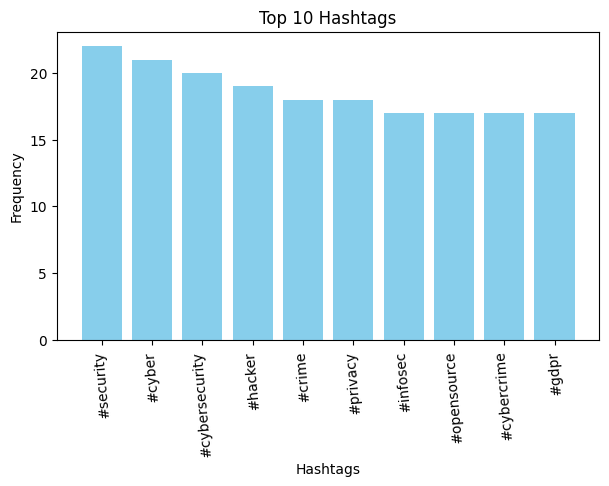

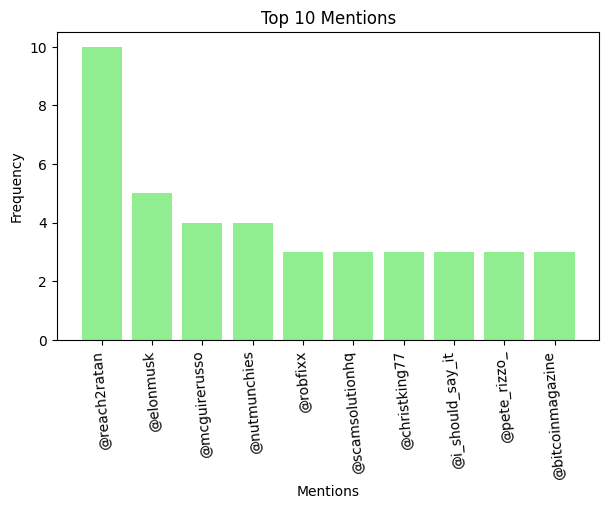

In [20]:
# Plotting Top Hashtags
top_hashtags = dict(hashtag_counts.most_common(10))
plt.figure(figsize=(7, 4))
plt.bar(top_hashtags.keys(), top_hashtags.values(), color='skyblue')
plt.title("Top 10 Hashtags")
plt.xticks(rotation=95)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.show()

# Plotting Top Mentions
top_mentions = dict(mention_counts.most_common(10))
plt.figure(figsize=(7, 4))
plt.bar(top_mentions.keys(), top_mentions.values(), color='lightgreen')
plt.title("Top 10 Mentions")
plt.xticks(rotation=95)
plt.xlabel("Mentions")
plt.ylabel("Frequency")
plt.show()

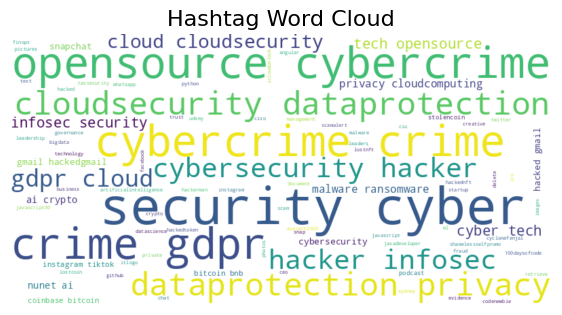

In [22]:
# wordcloud- Hashtags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_hashtags))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Hashtag Word Cloud", fontsize=16)
plt.show()

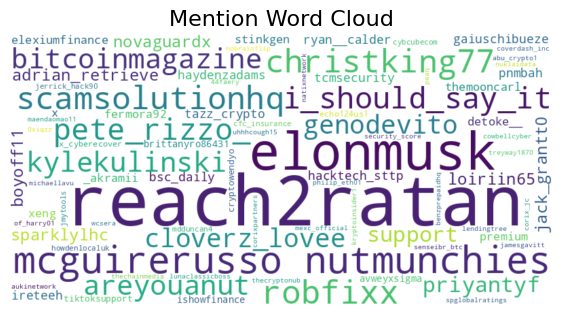

In [23]:
# Word Cloud- Mentions
wordcloud_mentions = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_mentions))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud_mentions, interpolation='bilinear')
plt.axis("off")
plt.title("Mention Word Cloud", fontsize=16)
plt.show()

In [24]:
df['cleaned_text']

,cleaned_text
0,over the years ive met a lot of people at cybe...
1,tracked by hidden tags apple and google unite ...
2,day 52 of me asking @pnmbah @gaiuschibueze @...
3,you must take immediate backup with the qfs qu...
4,unleash unparalleled expertise for data protec...
...,...
95,@0xiqzz i couldnt believe that this market sto...
96,at just 18 for cyber monday eufys smart entry ...
97,@lunaclassicboss @wcsera i was a victim too i ...
98,message me for snapchat account hack #snap\nte...


In [28]:
# For further testing, remove underscores, hashtags, and mentions
def preprocess_tweet(text):
  # Remove mentions (@username) and hashtags (#hashtag)
  text = re.sub(r'@\w+|#\w+', '', text)
  # Remove underscores
  text = re.sub(r'_', ' ', text)
  return text

# Apply the updated cleaning function to remove mentions and hashtags
df['cleaned_text'] = df['cleaned_text'].apply(preprocess_tweet)


In [29]:
df['cleaned_text']

,cleaned_text
0,over the years ive met a lot of people at cybe...
1,tracked by hidden tags apple and google unite ...
2,day 52 of me asking and for a collaborat...
3,you must take immediate backup with the qfs qu...
4,unleash unparalleled expertise for data protec...
...,...
95,i couldnt believe that this market stock is a...
96,at just 18 for cyber monday eufys smart entry ...
97,i was a victim too i advise you to contact ...
98,message me for snapchat account hack \ntext me...


In [31]:
df['cleaned_text'].duplicated().sum()

25

In [32]:
# drop duplicated
df = df.drop_duplicates(subset='cleaned_text')

In [33]:
df.describe()

,author_id,retweet_count,like_count,reply_count
count,7.500000e+01,75.000000,75.00000,75.000000
mean,1.003144e+18,0.080000,0.24000,0.026667
std,8.424427e+17,0.427437,0.81936,0.162192
min,1.506627e+07,0.000000,0.00000,0.000000
25%,2.180983e+09,0.000000,0.00000,0.000000
50%,1.416155e+18,0.000000,0.00000,0.000000
75%,1.858857e+18,0.000000,0.00000,0.000000
max,1.863048e+18,3.000000,5.00000,1.000000


In [34]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
# tokenization
df['tokens']= df['cleaned_text'].apply(word_tokenize)

<ipython-input-35-9857448af87c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens']= df['cleaned_text'].apply(word_tokenize)


In [36]:
# stopwords removing
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

<ipython-input-36-bcbe3c08c90d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [37]:
# lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

<ipython-input-37-209df9b93f08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


In [38]:
# saving cleaned data
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df.to_csv(cleaned_file_path, index=False)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df = pd.read_csv(cleaned_file_path)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_at         75 non-null     object
 1   author_id          75 non-null     int64 
 2   text               75 non-null     object
 3   retweet_count      75 non-null     int64 
 4   like_count         75 non-null     int64 
 5   reply_count        75 non-null     int64 
 6   cleaned_text       75 non-null     object
 7   hashtags           75 non-null     object
 8   mentions           75 non-null     object
 9   tokens             75 non-null     object
 10  filtered_tokens    75 non-null     object
 11  lemmatized_tokens  75 non-null     object
dtypes: int64(4), object(8)
memory usage: 7.2+ KB


In [42]:
df.shape

(75, 12)

In [43]:
df['cleaned_text'].describe()

,cleaned_text
count,75
unique,75
top,over the years ive met a lot of people at cybe...
freq,1


In [44]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.2 MB/s eta 0:00:00


In [45]:
import emoji

In [46]:
#
slang_dict ={
    "u": "you",
    "r": "are",
    "lol": "laugh out loud",
    "idk": "I don't know",
    "btw": "by the way",
    "omg": "oh my god",
    "brb": "be right back",
    "ty": "thank you",
    "np": "no problem",
    "smh": "shaking my head",
    "ive": "i have",
    "im": "i am"
}
# replace emojis with text
def replace_emojis(text):
  return emoji.demojize(text, delimiters=(" "," "))
# expand slang terms
def expand_slang(text, slang_dict):
  words = text.split()
  expanded_words = [slang_dict.get(word.lower, word) for word in words]
  return " ".join(expanded_words)

def advanced_cleaning(text):
  text = replace_emojis(text)
  text = expand_slang(text, slang_dict)
  return text
# updated df
df['cleaned_text_v2']= df['cleaned_text'].apply(advanced_cleaning)

In [47]:
print('DataFrame after advanced cleaning:')
print(df['cleaned_text_v2'])

DataFrame after advanced cleaning:
0     over the years ive met a lot of people at cybe...
1     tracked by hidden tags apple and google unite ...
2     day 52 of me asking and for a collaboration so...
3     you must take immediate backup with the qfs qu...
4     unleash unparalleled expertise for data protec...
                            ...                        
70    i couldnt believe that this market stock is a ...
71    at just 18 for cyber monday eufys smart entry ...
72    i was a victim too i advise you to contact hes...
73    message me for snapchat account hack text me n...
74    check it out gtgt episode 15 in series 5 of th...
Name: cleaned_text_v2, Length: 75, dtype: object


In [48]:
sample_text = df['cleaned_text'][10]
sample_output = df['cleaned_text_v2'][10]
print(sample_text,'\n')
print(sample_output)

i wrote a new article about identity and access management from the perspective of a cyber security expert check it out please 

i wrote a new article about identity and access management from the perspective of a cyber security expert check it out please


Word frequency analysis

Analysing most frequently used words

In [49]:
from collections import Counter

In [50]:

all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('and', 80), ('the', 65), ('cyber', 62), ('security', 62), ('to', 58), ('a', 41), ('on', 41), ('you', 40), ('for', 36), ('expert', 28), ('your', 26), ('whatsapp', 26), ('recovery', 24), ('him', 22), ('of', 21), ('i', 20), ('help', 19), ('it', 18), ('text', 18), ('is', 17)]


In [51]:
import matplotlib.pyplot as plt

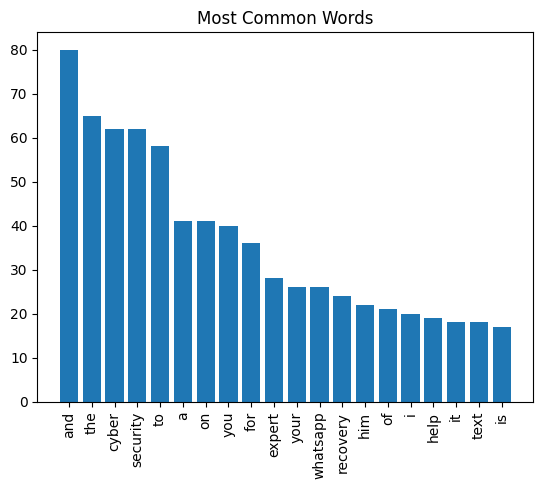

In [52]:
# visualizing the word freq
words, counts=zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Words")
plt.show()

In [53]:
from wordcloud import WordCloud

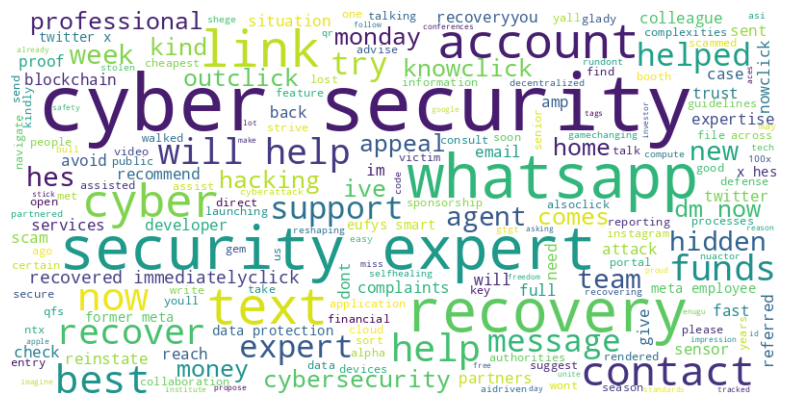

In [54]:
wordcloud = WordCloud(width=800, height = 400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [55]:
from textblob import TextBlob

In [56]:
# sentiment analysis
def analyze_sentiment(text):
  # Create a TextBlob object
  blob = TextBlob(text)
  # Get polarity score
  polarity = blob.sentiment.polarity
  # Classify sentiment
  if polarity > 0:
    sentiment = "Positive"
  elif polarity == 0:
    sentiment = "Neutral"
  else:
    sentiment = "Negative"
  return sentiment, polarity

# Apply sentiment analysis to the cleaned_text_v2 column
df[["Sentiment", "Polarity"]] = df["cleaned_text_v2"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

In [57]:
#
print('DataFrame after sentiment analysis:')
print(df[['cleaned_text_v2', 'Sentiment', 'Polarity']].head())

DataFrame after sentiment analysis:
                                     cleaned_text_v2 Sentiment  Polarity
0  over the years ive met a lot of people at cybe...  Positive  0.800000
1  tracked by hidden tags apple and google unite ...  Negative -0.166667
2  day 52 of me asking and for a collaboration so...  Positive  0.200000
3  you must take immediate backup with the qfs qu...  Positive  0.150000
4  unleash unparalleled expertise for data protec...   Neutral  0.000000


In [58]:
import seaborn as sns

<ipython-input-59-0ab02f77c7e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="viridis")


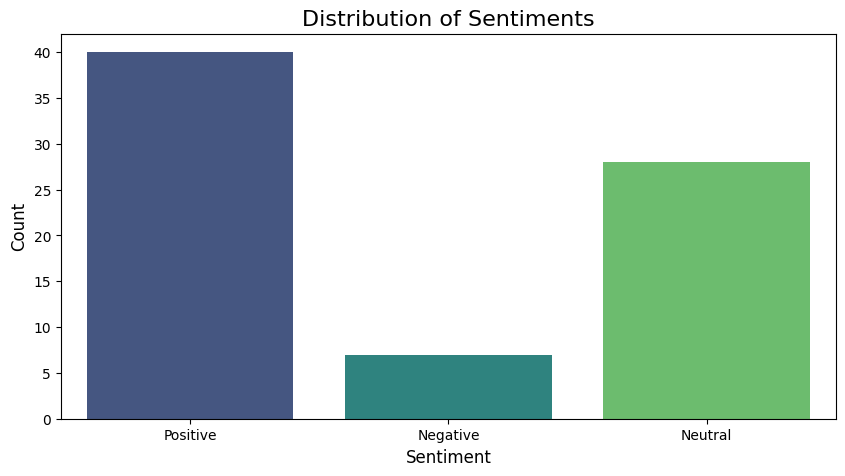

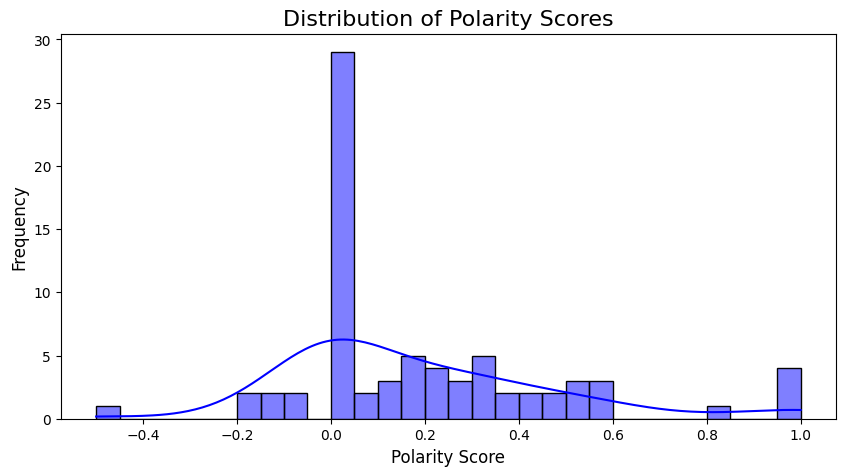

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Sentiment", palette="viridis")
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# polarity distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Polarity Scores", fontsize=16)
plt.xlabel("Polarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Named Entity Recognition**

In [60]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [61]:
def extract_entities(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities
df['Entities'] = df['cleaned_text_v2'].apply(extract_entities)

In [62]:
df.duplicated(['cleaned_text_v2']).sum()

18

In [63]:
# entity type freq
from collections import Counter
# flatten list of entities
all_entities = [label for entities in df['Entities'] for _, label in entities]

In [64]:
entity_counts = Counter(all_entities)

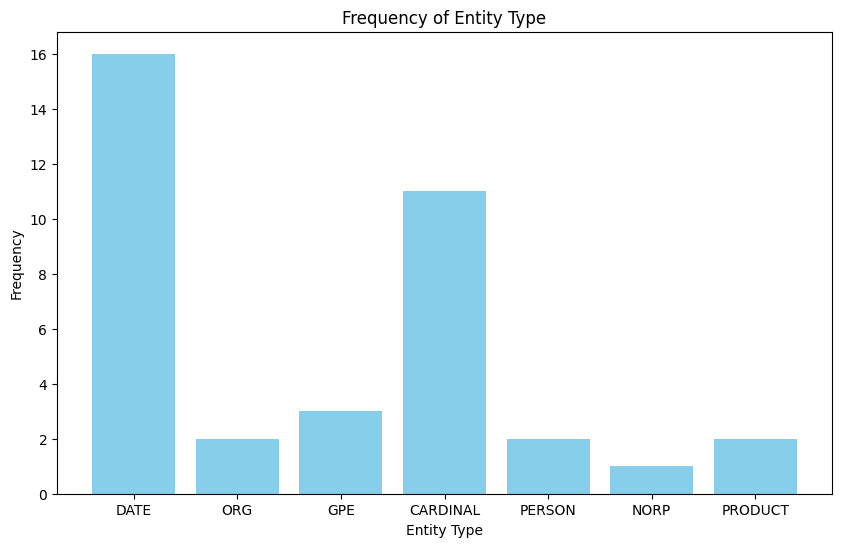

In [65]:
# ploting entities type
plt.figure(figsize=(10,6))
plt.bar(entity_counts.keys(), entity_counts.values(),color='skyblue')
plt.title('Frequency of Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()

In [66]:
# seperate column for each entity types
entity_types = ['PERSON', 'ORG', 'NORP', 'CARDINAL', 'ORDINAL', 'TIME', 'GPE', 'DATE']
for etype in entity_types:
  df[etype] = df['Entities'].apply(lambda entities: [ent for ent, label in entities if label == etype])

In [67]:
org_mentions = df[df['ORG'].apply(len)>0]
print(org_mentions[['cleaned_text_v2','ORG']])

                                      cleaned_text_v2       ORG
1   tracked by hidden tags apple and google unite ...  [google]
13  phd project in creating synthetic data and dat...     [phd]


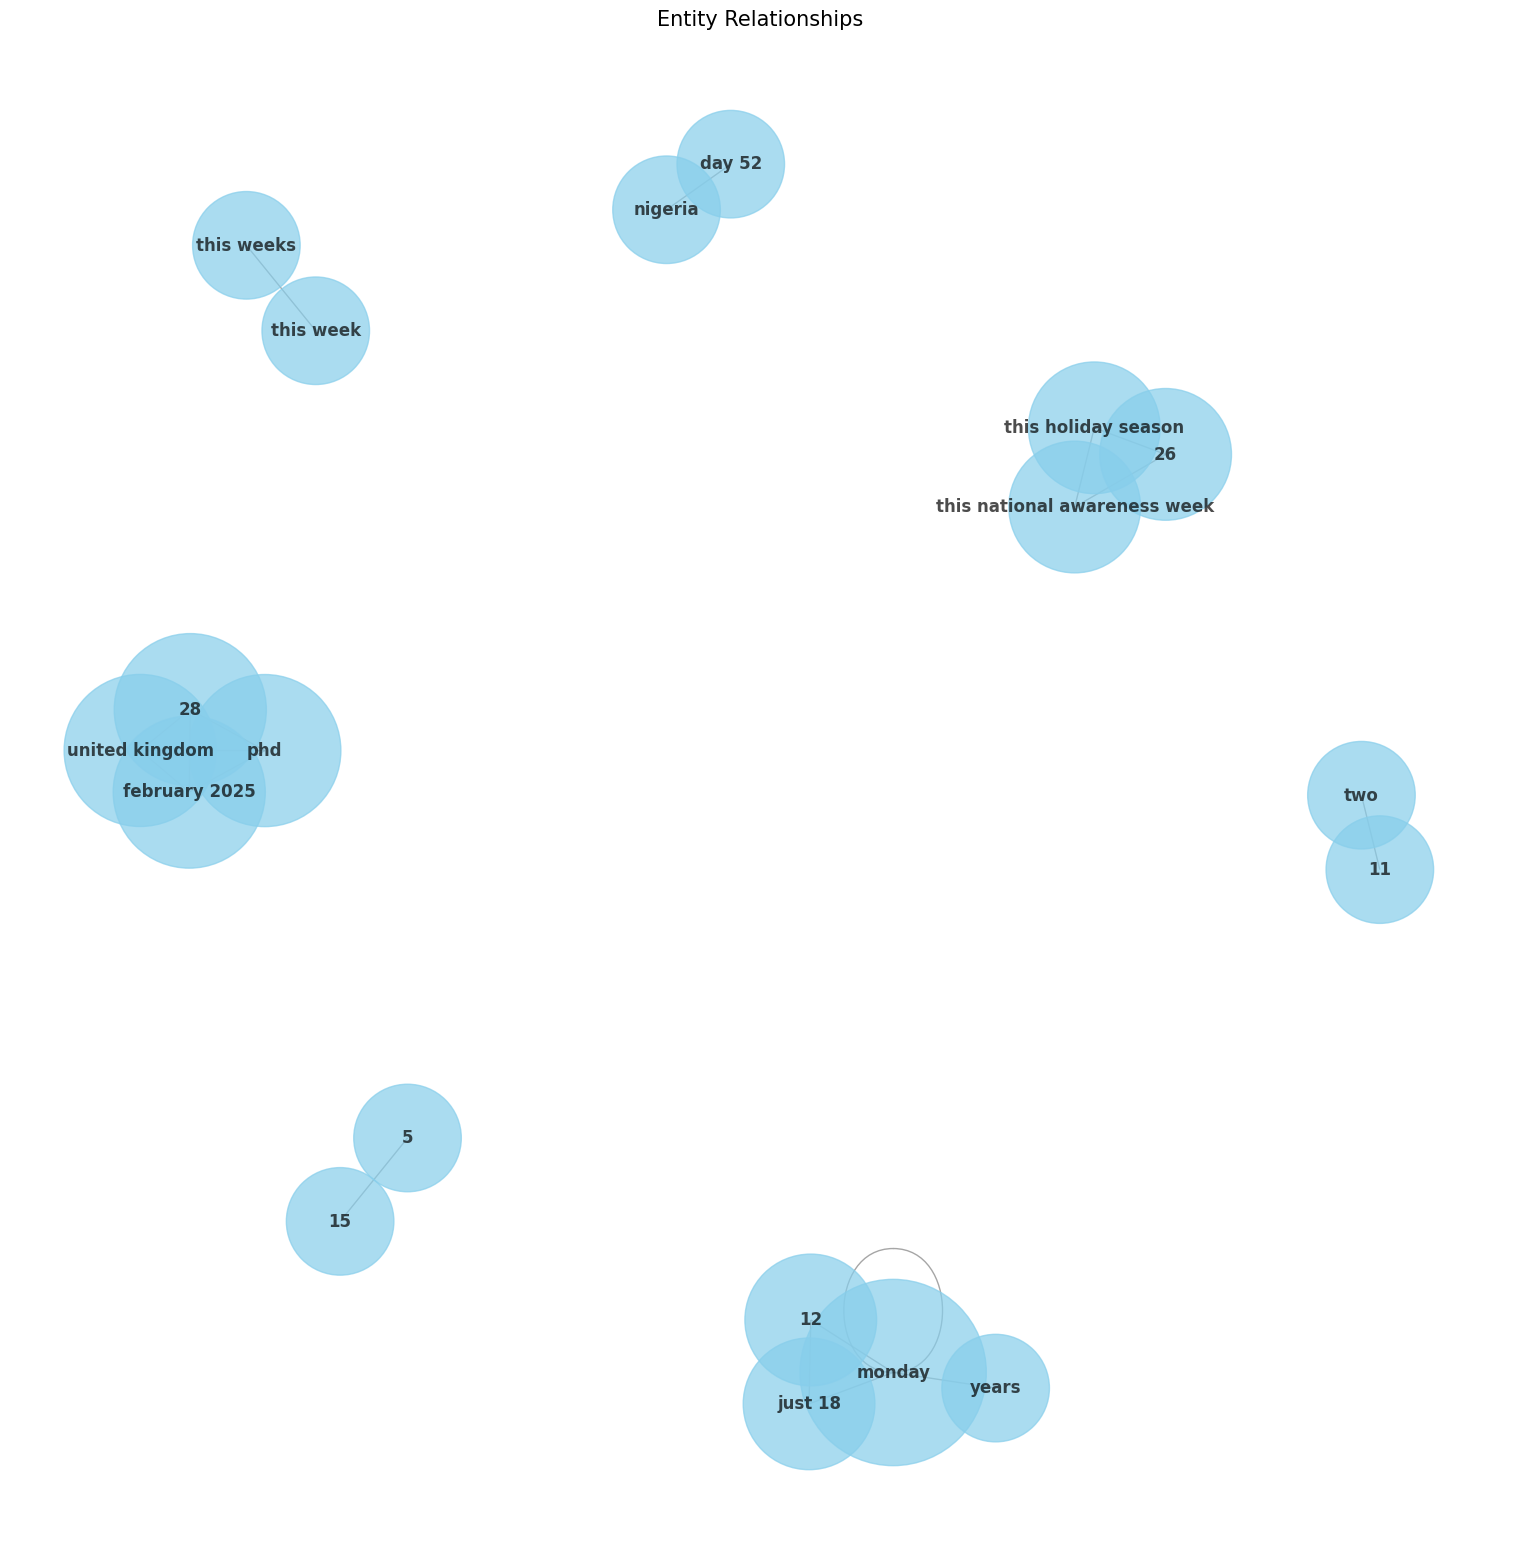

In [68]:
import networkx as nx

# create a graph
G = nx.Graph()

# adding edges for entities in each tweet
for entities in df['Entities']:
  for i in range(len(entities)):
    for j in range(i+1, len(entities)):
      G.add_edge(entities[i][0], entities[j][0])

# spring layout for better spacing
pos = nx.spring_layout(G, k=0.3)
node_sizes = [3000 * (G.degree(node)+1) for node in G.nodes]

# graph ploting
plt.figure(figsize=(15,15))
nx.draw(G,
        pos,
        with_labels=True,
        node_color='skyblue',
        font_size = 12,
        font_weight='bold',
        node_size=node_sizes,
        edge_color='gray', alpha=0.7)
plt.title('Entity Relationships',fontsize=15)
plt.show()

In [69]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
def synonym_repalcement(sentence, n=1):
  words = sentence.split()
  new_words = words.copy()
  random_words = list(set(words))
  random.shuffle(random_words)
  num_replaced = 0

  for word in random_words:
    synonyms = wordnet.synsets(word)
    if synonyms:
      synonym = random.choice(synonyms).lemmas()[0].name()
      new_words = [synonym if w == word else w for w in new_words]
      num_replaced += 1
    if num_replaced >= n:
      break
  return ' '.join(new_words)

df['Augmented_Text'] = df['cleaned_text_v2'].apply(lambda x: synonym_repalcement(x, n=2))
df[['cleaned_text_v2', 'Augmented_Text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_text_v2,Augmented_Text
0,over the years ive met a lot of people at cybe...,over the years ive met a lot of people at cybe...
1,tracked by hidden tags apple and google unite ...,tracked by hidden tags apple and google unite ...
2,day 52 of me asking and for a collaboration so...,day 52 of me asking and for deoxyadenosine_mon...
3,you must take immediate backup with the qfs qu...,you must take contiguous backup with the qfs q...
4,unleash unparalleled expertise for data protec...,unleash unparalleled expertness for data prote...


In [70]:
df['cleaned_text_v2'].head()

,cleaned_text_v2
0,over the years ive met a lot of people at cybe...
1,tracked by hidden tags apple and google unite ...
2,day 52 of me asking and for a collaboration so...
3,you must take immediate backup with the qfs qu...
4,unleash unparalleled expertise for data protec...


In [71]:
df['Augmented_Text'].head()

,Augmented_Text
0,over the years ive met a lot of people at cybe...
1,tracked by hidden tags apple and google unite ...
2,day 52 of me asking and for deoxyadenosine_mon...
3,you must take contiguous backup with the qfs q...
4,unleash unparalleled expertness for data prote...


In [72]:
# saving cleaned data
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_tweets.csv'
df.to_csv(cleaned_file_path, index=False)

In [73]:
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Storing Data in SQLite Database**

In [74]:
import sqlite3